# Deep Learning
## Assignment 1
The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the notMNIST dataset to be used with python experiments. This dataset is designed to look like the classic MNIST dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = os.path.join('data', 'notMNIST') #Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """
  A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified data\notMNIST\notMNIST_large.tar.gz
Found and verified data\notMNIST\notMNIST_small.tar.gz



Extract the dataset from the compressed .tar.gz file. This should give you a set of directories, labelled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

data\notMNIST\notMNIST_large already present - Skipping extraction of data\notMNIST\notMNIST_large.tar.gz.
['data\\notMNIST\\notMNIST_large\\A', 'data\\notMNIST\\notMNIST_large\\B', 'data\\notMNIST\\notMNIST_large\\C', 'data\\notMNIST\\notMNIST_large\\D', 'data\\notMNIST\\notMNIST_large\\E', 'data\\notMNIST\\notMNIST_large\\F', 'data\\notMNIST\\notMNIST_large\\G', 'data\\notMNIST\\notMNIST_large\\H', 'data\\notMNIST\\notMNIST_large\\I', 'data\\notMNIST\\notMNIST_large\\J']
data\notMNIST\notMNIST_small already present - Skipping extraction of data\notMNIST\notMNIST_small.tar.gz.
['data\\notMNIST\\notMNIST_small\\A', 'data\\notMNIST\\notMNIST_small\\B', 'data\\notMNIST\\notMNIST_small\\C', 'data\\notMNIST\\notMNIST_small\\D', 'data\\notMNIST\\notMNIST_small\\E', 'data\\notMNIST\\notMNIST_small\\F', 'data\\notMNIST\\notMNIST_small\\G', 'data\\notMNIST\\notMNIST_small\\H', 'data\\notMNIST\\notMNIST_small\\I', 'data\\notMNIST\\notMNIST_small\\J']


<hr>
## Problem 1

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.


In [4]:
import random

def display_samples(data_dir, sample_size):
  for folder in data_dir:
    print(folder)
    images = os.listdir(folder)
    image_sample = random.sample(images, sample_size)
    for image in image_sample:
      image_file = os.path.join(folder, image)
      i = Image(filename=image_file)
      display(i)

display_samples(train_folders, 1)
display_samples(test_folders, 1)

data\notMNIST\notMNIST_large\A


data\notMNIST\notMNIST_large\B


data\notMNIST\notMNIST_large\C


data\notMNIST\notMNIST_large\D


data\notMNIST\notMNIST_large\E


data\notMNIST\notMNIST_large\F


data\notMNIST\notMNIST_large\G


data\notMNIST\notMNIST_large\H


data\notMNIST\notMNIST_large\I


data\notMNIST\notMNIST_large\J


data\notMNIST\notMNIST_small\A


data\notMNIST\notMNIST_small\B


data\notMNIST\notMNIST_small\C


data\notMNIST\notMNIST_small\D


data\notMNIST\notMNIST_small\E


data\notMNIST\notMNIST_small\F


data\notMNIST\notMNIST_small\G


data\notMNIST\notMNIST_small\H


data\notMNIST\notMNIST_small\I


data\notMNIST\notMNIST_small\J


<hr>

Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road.

A few images might not be readable, we'll just skip them.

`load_letter` converts images in each folder into a 3D numpy array (image index, x, y). Some images that cannot be read are ignored

`maybe_pickle` pickles the data set i.e., converts the object into a byte stre

In [5]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

data\notMNIST\notMNIST_large\A.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\B.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\C.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\D.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\E.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\F.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\G.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\H.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\I.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_large\J.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_small\A.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_small\B.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_small\C.pickle already present - Skipping pickling.
data\notMNIST\notMNIST_sm

<hr>
## Problem 2
Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

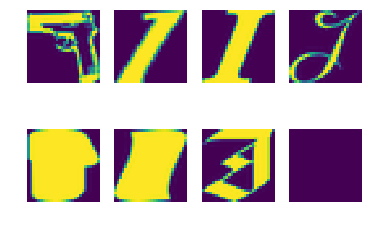

In [6]:
def display_pickle_samples(data_folders):
    folder = random.sample(data_folders, 1)
    pickle_file = ''.join(folder) + '.pickle'
    with open(pickle_file, 'rb') as f:
        dataset = pickle.load(f)
    plt.suptitle(''.join(pickle_file)[-7:-8])
    for i, img in enumerate(random.sample(list(dataset), 8)):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.imshow(img)

display_pickle_samples(train_folders)

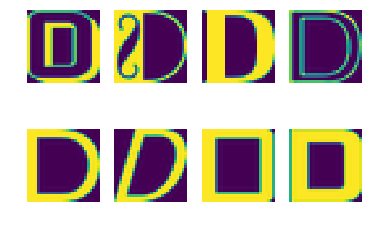

In [7]:
display_pickle_samples(test_folders)

<hr>
## Problem 3
Another check: we expect the data to be balanced across classes. Verify that.

Balanced implies more or less same number of training data for each class

In [8]:
def check_balancing(data_folders):
    for folder in data_folders:
        pickle_data = ''.join(folder) + '.pickle'
        classes = folder.split('\\')[2] + '\\' + folder.split('\\')[3]
        with open(pickle_data, 'rb') as f:
            dataset = pickle.load(f)
        print("Number of images in %s: %d" % (classes, len(dataset)))

check_balancing(train_folders)
check_balancing(test_folders)

Number of images in notMNIST_large\A: 52909
Number of images in notMNIST_large\B: 52911
Number of images in notMNIST_large\C: 52912
Number of images in notMNIST_large\D: 52911
Number of images in notMNIST_large\E: 52912
Number of images in notMNIST_large\F: 52912
Number of images in notMNIST_large\G: 52912
Number of images in notMNIST_large\H: 52912
Number of images in notMNIST_large\I: 52912
Number of images in notMNIST_large\J: 52911
Number of images in notMNIST_small\A: 1872
Number of images in notMNIST_small\B: 1873
Number of images in notMNIST_small\C: 1873
Number of images in notMNIST_small\D: 1873
Number of images in notMNIST_small\E: 1873
Number of images in notMNIST_small\F: 1872
Number of images in notMNIST_small\G: 1872
Number of images in notMNIST_small\H: 1872
Number of images in notMNIST_small\I: 1872
Number of images in notMNIST_small\J: 1872


More or less same number of training data for each class.
<hr>
Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune train_size as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [9]:
def make_arrays(nb_rows, img_size):
    '''
    Creates empty arrays. One for dataset and one for labels.
    '''
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes # validation dataset size for each class
    tsize_per_class = train_size // num_classes # training dataset size for each class
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):       
        try:
            # For each class
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                # Copies the first vsize_per_class examples for the validation set
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class
                
                # From vsize_per_class, takes the next tsize_per_class
                # for the training set
                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
            
    return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data.

It's important to have the labels well shuffled for the training and test distributions to match.

In [10]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

<hr>
## Problem 4
Convince yourself that the data is still good after shuffling!

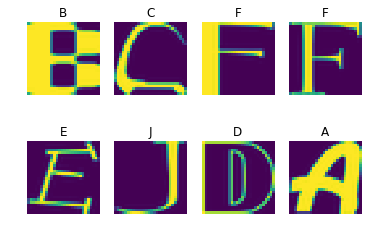

In [11]:
letters = { 0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D', 4 : 'E', 5 : 'F', 6 : 'G', 7 : 'H', 8 : 'I', 9 : 'J'}

def disp_data(dataset, labels):
    items = random.sample(range(len(labels)), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.title(letters[labels[item]])
        plt.imshow(dataset[item])

disp_data(train_dataset, train_labels)

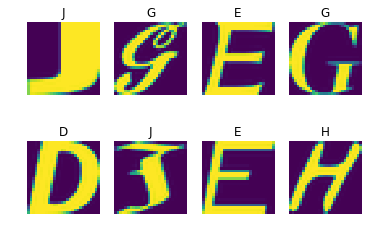

In [12]:
disp_data(test_dataset, test_labels)

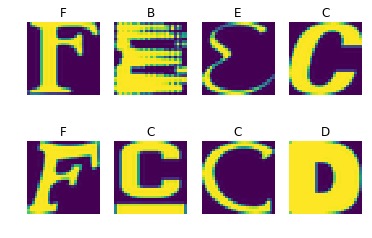

In [13]:
disp_data(valid_dataset, valid_labels)

<hr>
Finally, let's save the data for later reuse:

In [14]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [15]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512


<hr>
## Problem 5
By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it. Measure how much overlap there is between training, validation and test samples.

Optional questions:
 - What about near duplicates between datasets? (images that are almost identical)
 - Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.

In [24]:
import hashlib

def check_overlaps(dataset1, dataset2):
    overlaps = {}
    hash1 = np.array([hashlib.sha256(array).hexdigest() for array in dataset1])
    hash2 = np.array([hashlib.sha256(array).hexdigest() for array in dataset2])
    for i, h1 in enumerate(hash1):
        duplicates = np.where(hash2 == h1)
        if len(duplicates[0]):
            overlaps[i] = duplicates[0]
    return overlaps

overlaps = check_overlaps(train_dataset, test_dataset)
print("Number of overlaps in training and test datasets is %d" % (len(overlaps)))

Number of overlaps in training and test datasets is 3622


The near duplicates were not found. And the overlaps were also not removed (i.e., dataset was not sanitized).

This is because, I want to first establish the basics and get my neural networks working. Maybe, once I complete all the assignments and if I find the time, I will come back to this and rework my assignments with sanitized data.
<hr>

<hr>
## Problem 6
Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

In [27]:
logistic = LogisticRegression()

X_test = test_dataset.reshape(test_dataset.shape[0], 28 * 28)
y_test = test_labels

In [28]:
def get_train_data(train_data, train_labels, sample_size):
    X_train = train_data[:sample_size].reshape(sample_size, 28 * 28)
    y_train = train_labels[:sample_size]
    return X_train, y_train

In [33]:
sample_size = 50

X_train, y_train = get_train_data(train_dataset, train_labels, sample_size)
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print("Score with %d sample size: %f" %(sample_size, score))

Score with 50 sample size: 0.509000


In [34]:
sample_size = 100

X_train, y_train = get_train_data(train_dataset, train_labels, sample_size)
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print("Score with %d sample size: %f" %(sample_size, score))

Score with 100 sample size: 0.696600


In [35]:
sample_size = 1000

X_train, y_train = get_train_data(train_dataset, train_labels, sample_size)
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print("Score with %d sample size: %f" %(sample_size, score))

Score with 1000 sample size: 0.833300


In [36]:
sample_size = 5000

X_train, y_train = get_train_data(train_dataset, train_labels, sample_size)
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print("Score with %d sample size: %f" %(sample_size, score))

Score with 5000 sample size: 0.851100


In [ ]:
sample_size = train_dataset.shape[0] # entire dataset !!!

X_train, y_train = get_train_data(train_dataset, train_labels, sample_size)
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print("Score with %d sample size: %f" %(sample_size, score))

<hr>
This assignment was pretty cool. Imagine the power of a deep neural net if a simple logistic regression is able to obtain this great an accuracy!